# TP 1 Ciencia de datos
---------------

## Exploración Preliminar y Gráficos

In [7]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
from random import randint
from scipy.stats import shapiro, ttest_rel, ttest_ind, pearsonr, bartlett, wilcoxon

In [17]:
data = pd.read_csv('tiempos.txt', delim_whitespace=True)
data

,Atleta,tiempo_sol,tiempo_nublado,tiempo_lluvia
0,1,11.1,11.3,19.4
1,2,13.0,12.8,18.2
2,3,16.1,16.0,19.0
3,4,14.5,14.1,18.9
4,5,12.0,12.5,19.1
5,6,11.0,11.6,18.7
6,7,15.1,14.6,189.0
7,8,14.4,14.2,19.9
8,9,16.1,16.1,18.5
9,10,17.0,16.7,19.2


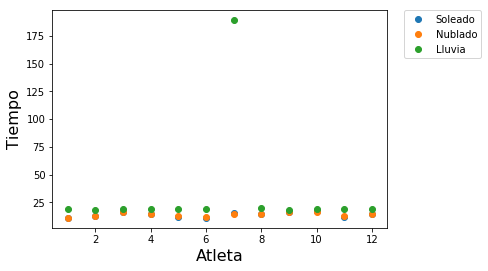

In [18]:
figure1 = plt.figure()

plot1 = plt.plot(data["Atleta"], data["tiempo_sol"], 'o', label="Soleado")
plot2 = plt.plot(data["Atleta"], data["tiempo_nublado"], 'o', label="Nublado")
plot3 = plt.plot(data["Atleta"], data["tiempo_lluvia"], 'o', label="Lluvia")

plt.xlabel("Atleta", fontsize=16)
plt.ylabel("Tiempo", fontsize=16)

# plt.xlim(0, 13)
# plt.ylim(0, 22)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

figure1.show()


In [10]:
data.drop(6, inplace=True)

Hay un único outlier que claramente es un error de medición y dificulta el estudio del resto de los datos. Para que todo atleta tenga sus tiempos medidos tanto con lluvia como para los días de sol y nublados, borramos todas las mediciones del atleta con el outlier. 

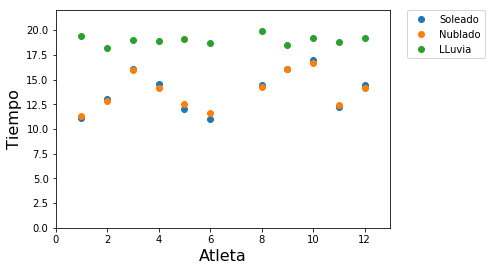

In [11]:
fontP = FontProperties()
figure1 = plt.figure()

plot1 = plt.plot(data["Atleta"], data["tiempo_sol"],'o', label="Soleado")
plot2 = plt.plot(data["Atleta"], data["tiempo_nublado"],'o', label="Nublado")
plot3 = plt.plot(data["Atleta"], data["tiempo_lluvia"],'o', label="LLuvia")


plt.ylabel("Tiempo", fontsize=16)
plt.xlabel("Atleta", fontsize=16)

plt.xlim(0, 13)
plt.ylim(0, 22)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

figure1.show()

# Tests

### Algunas cosas que queremos responder:

* Los atletas son más lentos en días de lluvia que en días soleados.
* El cielo nublado no influye en los tiempos de los atletas.
* La velocidad en días de lluvia es independiente del atleta.
* El clima influye en la velocidad de los atletas

### Primer test:

Vamos a hacer un test de permutaciones entre los tiempos de los días de sol y los de los días de lluvia. Tenemos como hipótesis nula H0 que el tiempo en días de lluvia es menor o igual al tiempo en días soleados.

Para no perder la individualidad de cada atleta, nuestras permutaciones son entre los tiempos de cada uno
.

Por ejemplo:

In [12]:
from IPython.display import display


print ("Original")
display(data[["Atleta", "tiempo_sol", "tiempo_lluvia"]])

print ("Permutacion")

data_copy = data.copy()

data_copy["tiempo_sol"][2], data_copy["tiempo_lluvia"][2] = data_copy["tiempo_lluvia"][2], data_copy["tiempo_sol"][2]
data_copy["tiempo_sol"][4], data_copy["tiempo_lluvia"][4] = data_copy["tiempo_lluvia"][4], data_copy["tiempo_sol"][4]
data_copy["tiempo_sol"][7], data_copy["tiempo_lluvia"][7] = data_copy["tiempo_lluvia"][7], data_copy["tiempo_sol"][7]
data_copy["tiempo_sol"][8], data_copy["tiempo_lluvia"][8] = data_copy["tiempo_lluvia"][8], data_copy["tiempo_sol"][8]
data_copy["tiempo_sol"][11], data_copy["tiempo_lluvia"][11] = data_copy["tiempo_lluvia"][11], data_copy["tiempo_sol"][11]


display(data_copy[["Atleta", "tiempo_sol", "tiempo_lluvia"]])


Original


,Atleta,tiempo_sol,tiempo_lluvia
0,1,11.1,19.4
1,2,13.0,18.2
2,3,16.1,19.0
3,4,14.5,18.9
4,5,12.0,19.1
5,6,11.0,18.7
7,8,14.4,19.9
8,9,16.1,18.5
9,10,17.0,19.2
10,11,12.2,18.8


Permutacion


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14

,Atleta,tiempo_sol,tiempo_lluvia
0,1,11.1,19.4
1,2,13.0,18.2
2,3,19.0,16.1
3,4,14.5,18.9
4,5,19.1,12.0
5,6,11.0,18.7
7,8,19.9,14.4
8,9,18.5,16.1
9,10,17.0,19.2
10,11,12.2,18.8


In [13]:
permutations = []

for i in range(2**len(data["tiempo_lluvia"])):
    mean_lluvia = 0.0
    mean_soleado = 0.0   
    for j in range(len(data["tiempo_lluvia"])+1):
        if j != 6:
            if randint(0,1):
                mean_lluvia += data["tiempo_sol"][j]
                mean_soleado += data["tiempo_lluvia"][j]
            else:
                mean_soleado += data["tiempo_sol"][j]
                mean_lluvia += data["tiempo_lluvia"][j]
    mean_soleado /= len(data["tiempo_lluvia"])
    mean_lluvia /= len(data["tiempo_lluvia"])
    permutations.append(mean_lluvia - mean_soleado)

('Nuestra diferencia de medias ', 5.1909090909090878)
('Cant mayor ', 2.0)
('Cant menor ', 2046.0)
('Proporci\xc3\xb3n mayor', 0.0009765625)


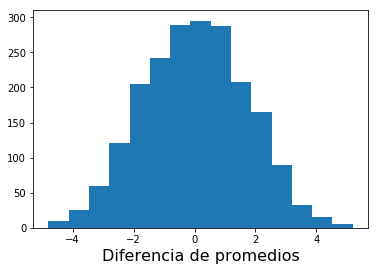

In [14]:
#Separe esto para poder plotear sin que se randomicen los datos de nuevo.
diff = data["tiempo_lluvia"].mean() - data["tiempo_sol"].mean()
print ("Nuestra diferencia de medias ", diff)

plt.xlabel("Diferencia de promedios", fontsize=16)
plt.hist(permutations,15)
cant_mayor = 0.0
cant_menor = 0.0
for permutation in permutations:
    if permutation >= diff:
        cant_mayor += 1
    else:
        cant_menor += 1
print ("Cant mayor ", cant_mayor)
print ("Cant menor ", cant_menor)
print ("Proporción mayor", cant_mayor/(cant_menor + cant_mayor))

Rechazamos la hipotesis nula porque el p-valor << 0.05, asi que podemos afirmar que el tiempo de dia soleado es menor que el de dia lluvioso.

### Segundo test:

Hacemos un t-test de muestras apareadas entre tiempo nublado y lluvioso. Para usar el t-test veamos primero que las variables estan normalmente distribuidas, tienen igual varianza y son independientes.

* Para ver que son normalmente distribuidas usamos el test de Shapiro, que tiene como hipótesis nula que los valores tienen una distribución normal.

In [9]:
print ("pvalue para dias nublados (shapiro): " , shapiro(data["tiempo_nublado"])[1])
print ("pvalue para dias lluviosos (shapiro): ", shapiro(data["tiempo_lluvia"])[1])

('pvalue para dias nublados (shapiro): ', 0.3774447739124298)
('pvalue para dias lluviosos (shapiro): ', 0.9883151054382324)


Dado el elevado p-value no podemos rechazar la hipótesis nula (no podemos decir que no están normalmente distribuidas). Esto nos da una base más sólida para afirmar que sí lo están.

* Para ver que tienen la misma varianza usamos el Test de Bartlett (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.bartlett.html#scipy.stats.bartlett)

In [10]:
print ("pvalue para test de bartlett: " ,bartlett(data["tiempo_nublado"], data["tiempo_lluvia"])[1])

('pvalue para test de bartlett: ', 0.00012920988487820481)


El test de bartlett nos indica que las muestras provienen de distribuciones con diferente varianza. Por lo tanto no se cumplen las hipótesis del test de Student y no podemos utilizarlo. Usamos entonces el test no paramétrico de Wilcoxon. 

Este test, sin embargo, nos da un indicio de que los tiempos entre los atletas en los dias lluviosos son mas parejos que los de dias soleados.

In [11]:
print("pvalue para el test de Wilcoxon: ", wilcoxon(data["tiempo_nublado"], data["tiempo_lluvia"])[1])

('pvalue para el test de Wilcoxon: ', 0.0033456181158508813)


El pvalue del test es lo suficientemente bajo como para afirmar que provienen de distribuciones con diferentes medias, esta afirmación igual pierde un poco de fuerza debido a que los tests no parámetricos como el de Wilcoxon recomiendan tener un número elevado de muestras (por ejemplo la documentación de scipy recomienda tener por lo menos 20 mediciones). 

Sin embargo la vamos a considerar suficiente como para afirmar que la media del tiempo cuando está nublado es menor que cuando llueve.

### Tercer test:

Lo mismo entre tiempo soleado y nublado
        

In [12]:
print ("pvalue para dias nublados (shapiro): " , shapiro(data["tiempo_nublado"])[1])
print ("pvalue para dias soleado (shapiro): ", shapiro(data["tiempo_sol"])[1])

print ("pvalue para test de bartlett: " ,bartlett(data["tiempo_nublado"], data["tiempo_sol"])[1])

('pvalue para dias nublados (shapiro): ', 0.3774447739124298)
('pvalue para dias soleado (shapiro): ', 0.42219114303588867)
('pvalue para test de bartlett: ', 0.72223760876724175)


En este caso ninguno de los tests nos permitió rechazar las hipótesis del test T de Student, por lo que lo utilizamos para comprobar si el tiempo medio de una carrera difiere cuando esta nublado o soleado.

In [13]:
print ("pvalue para test de Student: ", ttest_rel(data["tiempo_nublado"], data["tiempo_sol"]).pvalue)

('pvalue para test de Student: ', 0.99999999999999878)


Con el valor obtenido, no podemos afirmar que haya diferencias significativas en la media de los tiempos para estos climas.

### Cuarto test:

Suponemos que si un corredor es más rápido que otro en los días de sol, también lo es en los días de lluvia. Para ello realizamos un test de correlación de Pearson entre los tiempos de días soleados y días de lluvia.

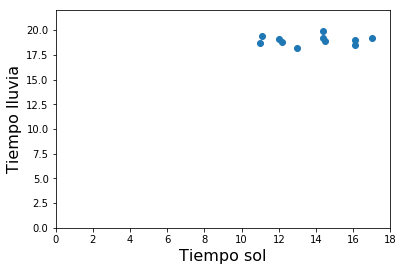

In [15]:
from matplotlib.font_manager import FontProperties


figure1 = plt.figure()

plot3 = plt.plot(data["tiempo_sol"], data["tiempo_lluvia"],'o')

plt.xlabel("Tiempo sol", fontsize=16)
plt.ylabel("Tiempo lluvia", fontsize=16)

plt.xlim(0, 18)
plt.ylim(0, 22)

figure1.show()


In [20]:
print ("pvalue del test de pearson: ", pearsonr(data["tiempo_sol"], data["tiempo_lluvia"])[1])

('pvalue del test de pearson: ', 0.56317152220921707)


Intuitivamente viendo el gráfico no parecería haber correlación evidente entre los datos. Esta intuición se ve reforzada por el valor elevado del pvalue del test de pearson, que no nos permite afirmar la existencia de algún tipo de correlación.

### Quinto test:
 
Queremos ver la correlacion entre los tiempos en dias soleados vs los nublados.

In [16]:
print ("Rho: {}\nPvalue: {}".format(pearsonr(data["tiempo_sol"], data["tiempo_nublado"])[0],
                                    pearsonr(data["tiempo_sol"], data["tiempo_nublado"])[1]))

Rho: 0.992241999795
Pvalue: 1.84695954864e-09


El resultado del test de pearson nos dio que los tiempos en dias soleados y en dias de lluvia estan fuertemente correlacionados.

# Conclusiones
En este trabajo práctico nos propusimos analizar los datos obtenidos al medir los tiempos, con distintos climas, de atletas en el entrenamiento para una carrera de 100 metros llanos. Los resultados obtenidos son los siguientes:

* Primer test: La media del tiempo en dias de soleados es menor que en dias de lluvia.

* Segundo test: La media del tiempo en dias de nublados es menor que en dias de lluvia y su varianza es distinta.

* Tercer test: No parece existir una diferencias significativa entre las medias de tiempos de dias de sol y de dias nublados, ni tampoco en su distribución.

* Cuarto test: No parece haber correlacion entre los tiempos en dias soleados y en dias lluviosos.

* Quinto test: Los tiempos en dias nublados y soleados estan fuertemente correlacionados

Si consideramos al tiempo en dias soleados el tiempo base, por los items 3 y 5 podemos afirmar que el cielo nublado no influye en los tiempos de los atletas. Ademas por el item 4 podemos afirmar que la velocidad en dias de lluvia es independiente de la velocidad base del atleta. Por otro lado, es evidente que la lluvia influye negativamente en la velocidad de los atletas.

# Consejos al Entrenador

A partir del análisis podemos determinar que el tiempo que tarda un atleta en recorrer 100 metros en días de lluvia no tiene correlación con los tiempos en días nublados y soleados. Sin embargo desconocemos las causas de esto y no podemos asumir que esto se debe a diferencias en el entrenamiento.

Para poder estudiar esto convendría tener información acerca de si cada atleta entrenó o no para correr bajo lluvia. A partir de estos datos podríamos descartar que haya una causalidad en caso de que no hallemos correlación entre el entrenamiento y el tiempo, y encontrar una fuerte correlación nos invitaría a creer en la causalidad.